# SPY vs AAPL Price Linear Relationship and Quiz

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import ipywidgets as widgets
from IPython.display import display, clear_output

In [15]:
# Download 2 years of daily data
tickers = ['SPY', 'GOOG']
data = yf.download(tickers, period='2y')['Close'].dropna()

[*********************100%***********************]  2 of 2 completed


In [12]:
from sklearn.linear_model import LinearRegression
# Prepare data
X = data['SPY'].values.reshape(-1, 1)
y = data['AAPL'].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict AAPL based on SPY
#data['AAPL_Pred'] = model.predict(X)

ImportError: DLL load failed while importing _qhull: The specified module could not be found.

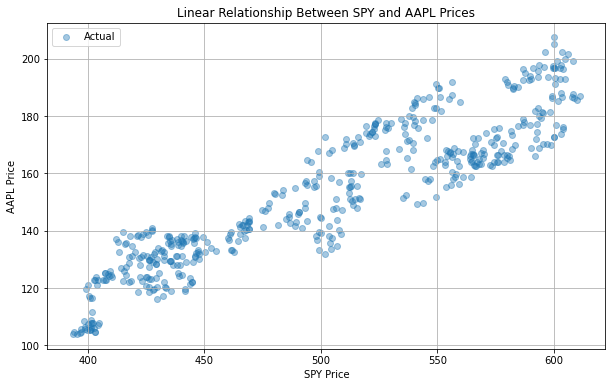

In [16]:
# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['SPY'], data['GOOG'], alpha=0.4, label='Actual')
#plt.plot(data['SPY'], data['AAPL_Pred'], color='red', label='Linear Fit')
plt.xlabel('SPY Price')
plt.ylabel('AAPL Price')
plt.title('Linear Relationship Between SPY and AAPL Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate interactive quiz
def quiz_question(spy_val):
    pred = model.predict([[spy_val]])[0]
    
    def on_submit(b):
        user_guess = float(textbox.value)
        clear_output(wait=True)
        print(f"If SPY is £{spy_val}, what do you think AAPL would be?")
        print(f"Your guess: £{user_guess:.2f}")
        print(f"Actual (predicted): £{pred:.2f}")
        print(f"Error: £{abs(pred - user_guess):.2f}")
    
    print(f"
Quiz Question: If SPY is £{spy_val}, what do you think AAPL would be?")
    textbox = widgets.Text(description='Your Guess:')
    button = widgets.Button(description="Submit")
    button.on_click(on_submit)
    display(textbox, button)

In [ ]:
# Launch quiz
spy_min, spy_max = data['SPY'].min(), data['SPY'].max()
quiz_vals = [round(random.uniform(spy_min, spy_max), 2) for _ in range(2)]
quiz_question(quiz_vals[0])